In [131]:
import pandas as pd
import numpy as np

###`Q-1:` Write a program to create an empty series.

In [132]:
# code here
a = pd.Series(np.zeros(4))
type(a)

pandas.core.series.Series

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [133]:
# code here
a = pd.Series([4,7,1,9,0])
b = pd.Series([0,5,2,6,7])


In [134]:
a

,0
0,4
1,7
2,1
3,9
4,0


In [135]:
b

,0
0,0
1,5
2,2
3,6
4,7


In [136]:
a-b

,0
0,4
1,2
2,-1
3,3
4,-7


In [137]:
a*b

,0
0,0
1,35
2,2
3,54
4,0


In [138]:
a/b

,0
0,inf
1,1.4
2,0.5
3,1.5
4,0.0


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [139]:
# code here
a = pd.Series([2, 4, 6, 8, 10])
b = pd.Series([1, 3, 5, 7, 10])
a==b

,0
0,False
1,False
2,False
3,False
4,True


In [140]:
a[a==b]

,0
4,10


In [141]:
b[a==b]

,0
4,10


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [142]:
series = pd.Series([1,2,'Python', 2.0, True, 100])
series = pd.to_numeric(series,errors='coerce')
series.astype(float)

,0
0,1.0
1,2.0
2,NaN
3,2.0
4,1.0
5,100.0


Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [143]:
ipl = pd.read_csv("/content/batsman_runs_series.csv",index_col='batter').squeeze()

In [144]:
# code here
ipl.sort_values(ascending=False).head(10)

,batsman_run
batter,
V Kohli,6634
S Dhawan,6244
DA Warner,5883
RG Sharma,5881
SK Raina,5536
AB de Villiers,5181
CH Gayle,4997
MS Dhoni,4978
RV Uthappa,4954


###`Q-7` No of players having runs above 3000

In [145]:
# code here
data = ipl.values
ipl[data>3000]

,batsman_run
batter,
AB de Villiers,5181
AM Rahane,4074
AT Rayudu,4190
CH Gayle,4997
DA Warner,5883
F du Plessis,3403
G Gambhir,4217
KA Pollard,3437
KD Karthik,4377


###`Q-8` No of players having runs above mean value?

In [146]:
# code here
mean_value = ipl.mean()
ipl[ipl>mean_value].size


128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [147]:
# code here
data_dict = {
"Chips and Fresh Tomato Salsa"  :  "$2.39",
"Izze"  :  "$3.39",
"Nantucket Nectar"  :  "$3.39",
"Chips and Tomatillo-Green Chili Salsa"  :  "$2.39",
"Chicken Bowl"  :  "$16.98",
"Burger" : np.nan
}

food_price = pd.Series(data_dict, name="item_price")
food_price

,item_price
Chips and Fresh Tomato Salsa,$2.39
Izze,$3.39
Nantucket Nectar,$3.39
Chips and Tomatillo-Green Chili Salsa,$2.39
Chicken Bowl,$16.98
Burger,NaN


In [148]:
food_price[food_price.isnull()].size

1

In [149]:
food_price[food_price.isnull()]

,item_price
Burger,NaN


In [150]:
food_price = food_price.apply(lambda x:(float(x.replace('$',""))*86.24) if "$" in str(x) else x)

In [151]:
to_fill = food_price.mean()
food_price = food_price.fillna(to_fill)

In [152]:
food_price

,item_price
Chips and Fresh Tomato Salsa,206.11360
Izze,292.35360
Nantucket Nectar,292.35360
Chips and Tomatillo-Green Chili Salsa,206.11360
Chicken Bowl,1464.35520
Burger,492.25792


###`Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [153]:
mean_price = food_price.mean()
mean_price

np.float64(492.25792)

In [154]:
np.percentile(food_price.values,30)

np.float64(249.23359999999997)

In [155]:
np.percentile(food_price.values,6)

np.float64(206.1136)

In [156]:
food_price.values

array([ 206.1136 ,  292.3536 ,  292.3536 ,  206.1136 , 1464.3552 ,
        492.25792])

<Axes: ylabel='Frequency'>

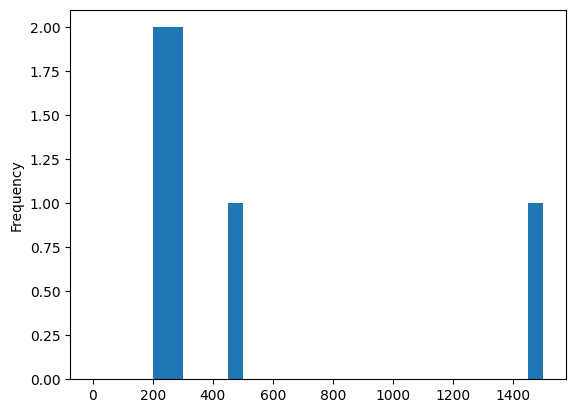

In [157]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500]
food_price.plot(kind='hist',bins=bins)

In [158]:
food_price[(1000<food_price) & (food_price<2000)]

,item_price
Chicken Bowl,1464.3552
